Generating map...


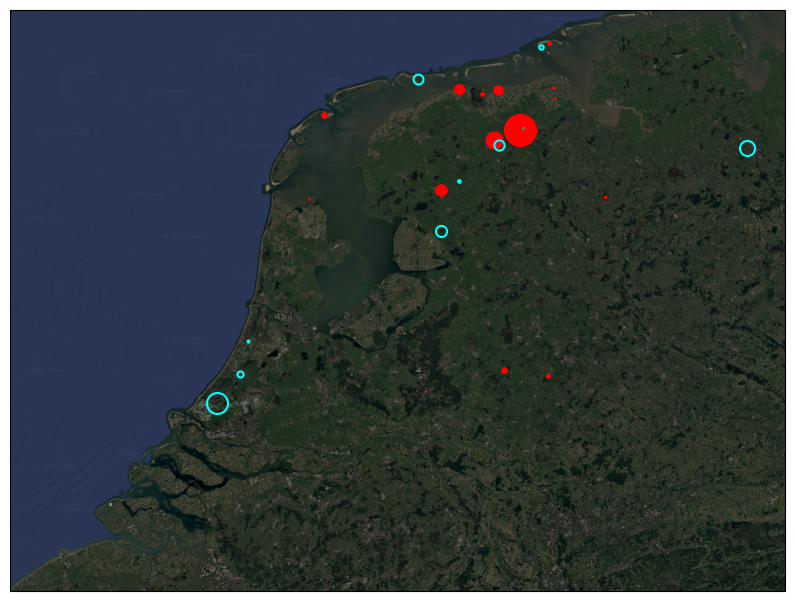

Map saved to sky_brightness_change_map.png


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles

# ---- CONFIG ---- #

# Data for each monitoring site.
# Includes name, coordinates, and the percentage change in sky brightness.
locations = [
    {"Site": "Nes", "Latitude": 53.449, "Longitude": 5.775, "Percent_change": 7.1954},
    {"Site": "Boerakker", "Latitude": 53.187, "Longitude": 6.329, "Percent_change": -12.0503},
    {"Site": "Ostland", "Latitude": 53.607, "Longitude": 6.727, "Percent_change": -2.6701},
    {"Site": "Borkum", "Latitude": 53.587, "Longitude": 6.663, "Percent_change": 3.2237},
    {"Site": "DeZilk", "Latitude": 52.301, "Longitude": 4.542, "Percent_change": 1.3761},
    {"Site": "Gorredijk", "Latitude": 53.008, "Longitude": 6.074, "Percent_change": 1.8576},
    {"Site": "DeHeld", "Latitude": 53.228, "Longitude": 6.512, "Percent_change": -22.8256},
    {"Site": "Zernike", "Latitude": 53.24, "Longitude": 6.536, "Percent_change": 0.3394},
    {"Site": "Haaksbergen", "Latitude": 52.149, "Longitude": 6.718, "Percent_change": -2.4686},
    {"Site": "Heerenveen", "Latitude": 52.967, "Longitude": 5.94, "Percent_change": -8.0921},
    {"Site": "Heerenveen-Station", "Latitude": 52.96, "Longitude": 5.915, "Percent_change": -0.4792},
    {"Site": "Hippolytushoef", "Latitude": 52.929, "Longitude": 4.986, "Percent_change": -0.9617},
    {"Site": "Hornhuizen", "Latitude": 53.403, "Longitude": 6.352, "Percent_change": -6.6778},
    {"Site": "Lauwersoog", "Latitude": 53.385, "Longitude": 6.235, "Percent_change": -2.4761},
    {"Site": "Leiden", "Latitude": 52.155, "Longitude": 4.483, "Percent_change": 4.4436},
    {"Site": "Lochem", "Latitude": 52.172, "Longitude": 6.401, "Percent_change": -3.784},
    {"Site": "Oostkapelle", "Latitude": 51.572, "Longitude": 3.537, "Percent_change": 0.6216},
    {"Site": "Rijswijk", "Latitude": 52.026, "Longitude": 4.314, "Percent_change": 15.1072},
    {"Site": "Roodeschool", "Latitude": 53.412, "Longitude": 6.755, "Percent_change": -1.1933},
    {"Site": "Sellingen", "Latitude": 52.938, "Longitude": 7.131, "Percent_change": -1.4072},
    {"Site": "Texel", "Latitude": 53.003, "Longitude": 4.787, "Percent_change": -0.0812},
    {"Site": "Vlieland-Oost", "Latitude": 53.295, "Longitude": 5.092, "Percent_change": -3.8895},
    {"Site": "Weerribben", "Latitude": 52.788, "Longitude": 5.938, "Percent_change": 8.034},
    {"Site": "Oldenburg", "Latitude": 53.15292605, "Longitude": 8.165231368, "Percent_change": 10.8656},
    {"Site": "tZandt", "Latitude": 53.3695, "Longitude": 6.7712, "Percent_change": -0.8032},
    {"Site": "Tolbert", "Latitude": 53.1651, "Longitude": 6.3596, "Percent_change": 7.3352},
    {"Site": "Moddergat", "Latitude": 53.40656, "Longitude": 6.06985, "Percent_change": -6.936}
]

# ---- FUNCTIONS ---- #

def create_sky_map(data, output_filename):
    """
    Generates and saves a map showing changes in sky brightness.

    Args:
        data (list): A list of dictionaries, where each dictionary represents a location.
        output_filename (str): The path to save the output image file.
    """
    print("Generating map...")
    plt.figure(figsize=(10, 8))

    # Use Google's satellite imagery as a basemap
    imagery = img_tiles.GoogleTiles(style='satellite')
    ax = plt.axes(projection=imagery.crs)
    ax.add_image(imagery, 9, alpha=1)

    # Add a semi-transparent overlay to enhance marker visibility
    ax.add_artist(plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, facecolor='black', alpha=0.45))

    # Plot each location as a circle on the map.
    # The size of the circle corresponds to the magnitude of change.
    for loc in data:
        change = loc["Percent_change"]
        lon = loc["Longitude"]
        lat = loc["Latitude"]

        if change >= 0:
            # Cyan circles for darkening skies (improvement)
            ax.plot(lon, lat, 'o',
                    markersize=abs(change),
                    transform=ccrs.PlateCarree(),
                    color='cyan',
                    markerfacecolor='none',
                    markeredgewidth=1.5,
                    label='Darkening')
        else:
            # Red circles for brightening skies (worsening)
            ax.plot(lon, lat, 'o',
                    markersize=abs(change),
                    transform=ccrs.PlateCarree(),
                    color='red',
                    label='Brightening')

    plt.savefig(output_filename, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()
    print(f"Map saved to {output_filename}")


# ---- EXECUTION ---- #

if __name__ == "__main__":
    output_file = "sky_brightness_change_map.png"
    create_sky_map(locations, output_file)